# **Music Genre Classification**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/Data/features_3_sec.csv')

## **Data Exploration**

In [ ]:
df.shape

(9990, 60)

In [ ]:
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [ ]:
df.tail()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
9985,rock.00099.5.wav,66149,0.349126,0.080515,0.050019,0.000097,1499.083005,164266.886443,1718.707215,85931.574523,...,42.485981,-9.094270,38.326839,-4.246976,31.049839,-5.625813,48.804092,1.818823,38.966969,rock
9986,rock.00099.6.wav,66149,0.372564,0.082626,0.057897,0.000088,1847.965128,281054.935973,1906.468492,99727.037054,...,32.415203,-12.375726,66.418587,-3.081278,54.414265,-11.960546,63.452255,0.428857,18.697033,rock
9987,rock.00099.7.wav,66149,0.347481,0.089019,0.052403,0.000701,1346.157659,662956.246325,1561.859087,138762.841945,...,78.228149,-2.524483,21.778994,4.809936,25.980829,1.775686,48.582378,-0.299545,41.586990,rock
9988,rock.00099.8.wav,66149,0.387527,0.084815,0.066430,0.000320,2084.515327,203891.039161,2018.366254,22860.992562,...,28.323744,-5.363541,17.209942,6.462601,21.442928,2.354765,24.843613,0.675824,12.787750,rock
9989,rock.00099.9.wav,66149,0.369293,0.086759,0.050524,0.000067,1634.330126,411429.169769,1867.422378,119722.211518,...,38.801735,-11.598399,58.983097,-0.178517,55.761299,-6.903252,39.485901,-3.412534,31.727489,rock


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9990 entries, 0 to 9989
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 9990 non-null   object 
 1   length                   9990 non-null   int64  
 2   chroma_stft_mean         9990 non-null   float64
 3   chroma_stft_var          9990 non-null   float64
 4   rms_mean                 9990 non-null   float64
 5   rms_var                  9990 non-null   float64
 6   spectral_centroid_mean   9990 non-null   float64
 7   spectral_centroid_var    9990 non-null   float64
 8   spectral_bandwidth_mean  9990 non-null   float64
 9   spectral_bandwidth_var   9990 non-null   float64
 10  rolloff_mean             9990 non-null   float64
 11  rolloff_var              9990 non-null   float64
 12  zero_crossing_rate_mean  9990 non-null   float64
 13  zero_crossing_rate_var   9990 non-null   float64
 14  harmony_mean            

## **Preprocessing and Model Training (Tabular Data)**

In [ ]:
df.isna().sum()

,0
filename,0
length,0
chroma_stft_mean,0
chroma_stft_var,0
rms_mean,0
rms_var,0
spectral_centroid_mean,0
spectral_centroid_var,0
spectral_bandwidth_mean,0
spectral_bandwidth_var,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
X=df.drop(['filename','label'],axis=1)
y=df['label']

In [ ]:
# Encode genre labels to numbers
encoder = LabelEncoder()
y = encoder.fit_transform(y)
num_classes = len(encoder.classes_)

In [ ]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **1. Random Forest**

In [ ]:
rf=RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred=rf.predict(X_test)

Random Forest
Accuracy: 0.8828828828828829
classification report               precision    recall  f1-score   support

           0       0.87      0.87      0.87       208
           1       0.94      0.98      0.96       203
           2       0.80      0.84      0.82       186
           3       0.85      0.83      0.84       199
           4       0.92      0.89      0.90       218
           5       0.86      0.93      0.89       192
           6       0.87      0.95      0.91       204
           7       0.92      0.95      0.93       180
           8       0.92      0.88      0.90       211
           9       0.89      0.72      0.79       197

    accuracy                           0.88      1998
   macro avg       0.88      0.88      0.88      1998
weighted avg       0.88      0.88      0.88      1998



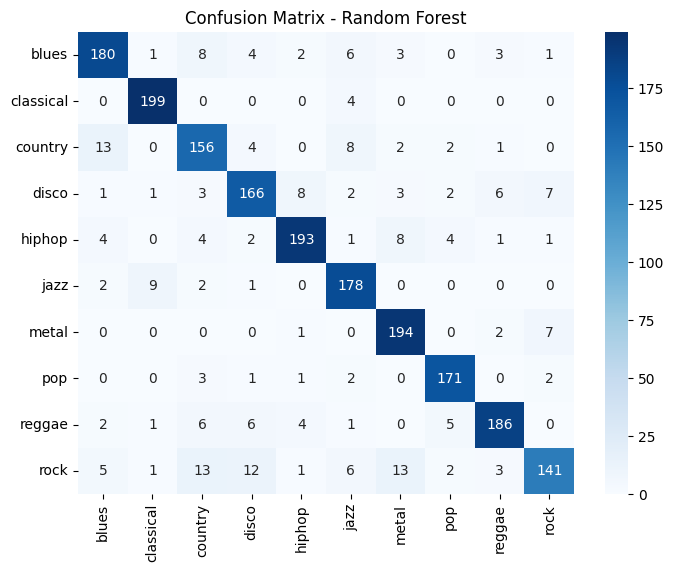

In [ ]:
print("Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("classification report", classification_report(y_test, y_pred))

def plot_confusion(y_true, y_pred, title, color):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt="d",
            xticklabels=encoder.classes_,
            yticklabels=encoder.classes_, cmap=color)
    plt.title(title)
    plt.show()

plot_confusion(y_test, y_pred, "Confusion Matrix - Random Forest", "Blues")

### **2. XGBoost**

In [ ]:
xgb = XGBClassifier(n_estimators=300,eval_metric='mlogloss', random_state=42)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
y_pred_xgb = xgb.predict(X_test)

XGBoost
Accuracy: 0.9144144144144144
classification report               precision    recall  f1-score   support

           0       0.92      0.88      0.90       208
           1       0.93      0.98      0.95       203
           2       0.83      0.89      0.86       186
           3       0.90      0.90      0.90       199
           4       0.96      0.91      0.93       218
           5       0.90      0.92      0.91       192
           6       0.95      0.96      0.95       204
           7       0.94      0.97      0.95       180
           8       0.94      0.89      0.91       211
           9       0.88      0.86      0.87       197

    accuracy                           0.91      1998
   macro avg       0.91      0.91      0.91      1998
weighted avg       0.92      0.91      0.91      1998



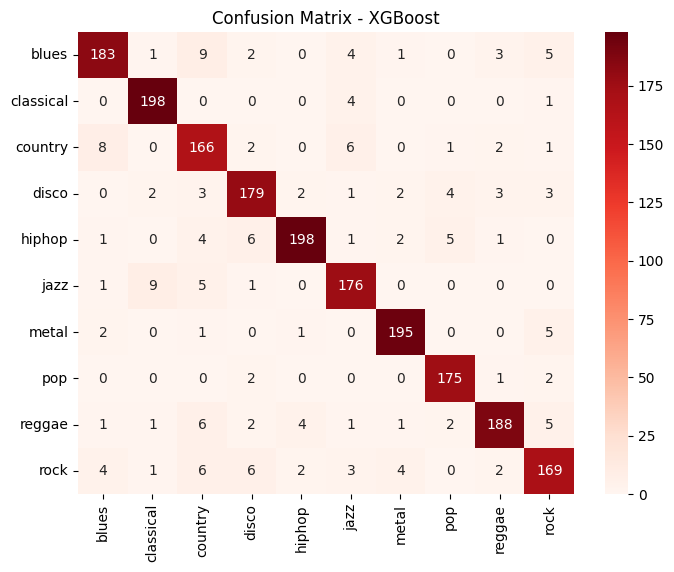

In [ ]:
print("XGBoost")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("classification report", classification_report(y_test, y_pred_xgb))

plot_confusion(y_test, y_pred_xgb, "Confusion Matrix - XGBoost", "Reds")

### **Hyperparameter Tuning**

*Using RandomizedSearchCV*

In [ ]:
params = {
    "n_estimators": [200, 400],
    "max_depth": [6, 8, 10],
    "learning_rate": [0.01, 0.1],
    "subsample": [0.7, 1],
}
rand = RandomizedSearchCV(XGBClassifier(eval_metric="mlogloss"),
                    params, cv=3, scoring="accuracy", n_jobs=-1)
rand.fit(X_train, y_train)
print("Best Accuracy:", rand.best_score_)
print("Best Parameters:", rand.best_params_)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Best Accuracy: 0.9249626360333275
Best Parameters: {'subsample': 0.7, 'n_estimators': 400, 'max_depth': 6, 'learning_rate': 0.1}


XGBoost Model Results(Tuned - RandomizedSearchCV):
XGBoost Accuracy: 0.9435127978817299
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       216
           1       0.95      0.98      0.96       213
           2       0.90      0.95      0.92       189
           3       0.93      0.91      0.92       184
           4       0.98      0.93      0.96       201
           5       0.92      0.92      0.92       130

    accuracy                           0.94      1133
   macro avg       0.94      0.94      0.94      1133
weighted avg       0.94      0.94      0.94      1133



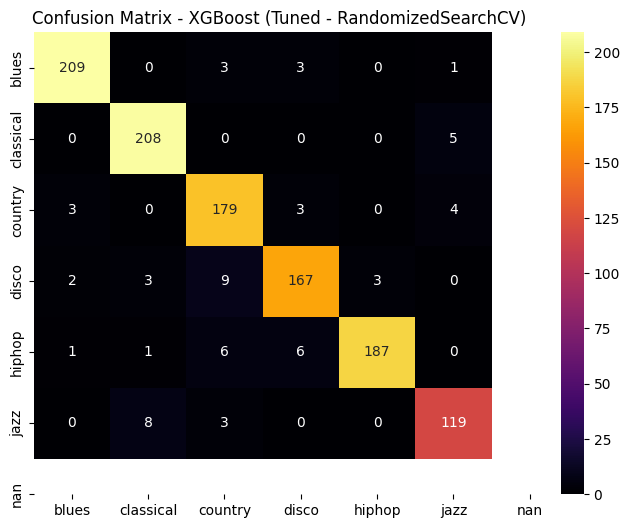

In [ ]:
xgb_rand_best = rand.best_estimator_
xgb_rand_best_y_pred = xgb_rand_best.predict(X_test)

print("XGBoost Model Results(Tuned - RandomizedSearchCV)")
print("Accuracy:", accuracy_score(y_test, xgb_rand_best_y_pred))
print("classification report", classification_report(y_test, xgb_rand_best_y_pred))

plot_confusion(y_test, y_pred_xgb, "Confusion Matrix - XGBoost (Tuned - RandomizedSearchCV)", "inferno")

## **Spectrogram-Based Classification**

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import os


In [4]:
data_dir = "/content/drive/MyDrive/Dataset/Data/images_original"

# List genres (folders)
genres = os.listdir(data_dir)
print("Genres:", genres)

# Count images per genre
for genre in genres:
    count = len(os.listdir(os.path.join(data_dir, genre)))
    print(f"{genre}: {count} images")


Genres: ['metal', 'jazz', 'pop', 'rock', 'reggae', 'disco', 'hiphop', 'country', 'classical', 'blues']
metal: 100 images
jazz: 99 images
pop: 100 images
rock: 100 images
reggae: 100 images
disco: 100 images
hiphop: 100 images
country: 100 images
classical: 100 images
blues: 100 images


In [5]:
from PIL import Image

bad_files = []
for genre in genres:
    for file in os.listdir(os.path.join(data_dir, genre)):
        path = os.path.join(data_dir, genre, file)
        try:
            img = Image.open(path)
            img.verify()
        except Exception as e:
            bad_files.append(path)

print("Corrupted files:", bad_files)


Corrupted files: []


### **1. Custom CNN**

**Prepare Data**

In [6]:
# Image size and batch size
img_size = (128, 128)
batch_size = 32

# Data generators
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_gen = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="training"
)

val_gen = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation"
)

Found 800 images belonging to 10 classes.
Found 199 images belonging to 10 classes.


**Build a Simple CNN**

In [7]:
cnn_model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(256, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_gen.num_classes, activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
cnn_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [9]:
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,359,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,750,538 (10.49 MB)

 Trainable params: 2,750,538 (10.49 MB)

 Non-trainable params: 0 (0.00 B)

**Train CNN**

In [10]:
history = cnn_model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=20
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.1193 - loss: 2.3195 - val_accuracy: 0.2513 - val_loss: 2.2796
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.1893 - loss: 2.2137 - val_accuracy: 0.2412 - val_loss: 2.0652
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.2578 - loss: 2.0414 - val_accuracy: 0.2714 - val_loss: 2.0175
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.2682 - loss: 1.9278 - val_accuracy: 0.3015 - val_loss: 1.9247
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.3098 - loss: 1.8260 - val_accuracy: 0.3467 - val_loss: 1.8029
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.3622 - loss: 1.7294 - val_accuracy: 0.3618 - val_loss: 1.9566
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.4164 - loss: 1.6808 - val_accuracy: 0.3668 - val_loss: 1.7241
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.4552 - loss: 1.5033 - val_accuracy: 0.4221 - val_loss:

 **Evaluate**

In [11]:
loss, acc = cnn_model.evaluate(val_gen)
custom_cnn_acc = acc
print("CNN Validation Accuracy:", acc)

7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 573ms/step - accuracy: 0.4788 - loss: 1.9292
CNN Validation Accuracy: 0.5025125741958618


### **2. Pretrained Model (VGG16)**

**Prepare Data**

In [ ]:
img_size = (224, 224)   # larger size for pretrained models
batch_size = 32

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_gen = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="training"
)

val_gen = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation"
)

Found 800 images belonging to 10 classes.
Found 199 images belonging to 10 classes.


**VGG16 Model**

In [ ]:
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(224,224,3))

for layer in base_model.layers:
    layer.trainable = False

vgg_model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_gen.num_classes, activation='softmax')
])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
vgg_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
vgg_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,140,042 (80.64 MB)

 Trainable params: 13,504,778 (51.52 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

**Train Model (Transfer Learning)**

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = vgg_model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=15,
    callbacks=[early_stop]
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 579s 23s/step - accuracy: 0.1229 - loss: 3.4978 - val_accuracy: 0.3216 - val_loss: 2.0099
Epoch 2/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 619s 23s/step - accuracy: 0.2147 - loss: 2.1175 - val_accuracy: 0.3166 - val_loss: 1.9684
Epoch 3/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 572s 23s/step - accuracy: 0.2873 - loss: 2.0019 - val_accuracy: 0.3668 - val_loss: 1.8044
Epoch 4/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 574s 23s/step - accuracy: 0.2813 - loss: 1.9710 - val_accuracy: 0.4673 - val_loss: 1.7606
Epoch 5/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 595s 24s/step - accuracy: 0.3149 - loss: 1.9147 - val_accuracy: 0.3769 - val_loss: 1.7905
Epoch 6/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 593s 24s/step - accuracy: 0.3117 - loss: 1.8407 - val_accuracy: 0.3869 - val_loss: 1.6800
Epoch 7/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 587s 22s/step - accuracy: 0.3115 - loss: 1.8328 - val_accuracy: 0.3869 - val_loss: 1.6769
Epoch 8/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 560s 22s/step - accuracy: 0.3654 - loss: 1.7188 - val_accuracy: 0.

 **Evaluate**

In [ ]:
loss, acc = vgg_model.evaluate(val_gen)
vvg16_transfer_acc = acc
print("VGG16 Validation Accuracy:", acc)

7/7 ━━━━━━━━━━━━━━━━━━━━ 110s 15s/step - accuracy: 0.5480 - loss: 1.4565
VGG16 Validation Accuracy: 0.5326633453369141


## **Fine-Tuning**

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Unfreeze last 4 convolutional layers
for layer in base_model.layers[-4:]:
    layer.trainable = True

vgg_model.compile(optimizer=Adam(1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Fine-tune
history_finetune = vgg_model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10,
    callbacks=[early_stop]
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 699s 28s/step - accuracy: 0.0788 - loss: 2.7011 - val_accuracy: 0.3668 - val_loss: 2.1550
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 667s 27s/step - accuracy: 0.2181 - loss: 2.1881 - val_accuracy: 0.3719 - val_loss: 1.9666
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 679s 27s/step - accuracy: 0.3196 - loss: 1.9689 - val_accuracy: 0.4322 - val_loss: 1.7782
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 673s 27s/step - accuracy: 0.4490 - loss: 1.6882 - val_accuracy: 0.4573 - val_loss: 1.5909
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 641s 26s/step - accuracy: 0.5221 - loss: 1.4926 - val_accuracy: 0.5075 - val_loss: 1.4738
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 639s 26s/step - accuracy: 0.5529 - loss: 1.3395 - val_accuracy: 0.5377 - val_loss: 1.4081
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 640s 26s/step - accuracy: 0.6059 - loss: 1.2081 - val_accuracy: 0.5075 - val_loss: 1.3468
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 645s 26s/step - accuracy: 0.6543 - loss: 1.0882 - val_accuracy: 0.

### **Evaluate**

In [ ]:
loss, acc = vgg_model.evaluate(val_gen)
vvg16_fine_tuned_acc = acc
print("VGG16(Tuned) Validation Accuracy:", acc)

7/7 ━━━━━━━━━━━━━━━━━━━━ 109s 15s/step - accuracy: 0.5750 - loss: 1.2242
VGG16(Tuned) Validation Accuracy: 0.5829145908355713


## **Comparing All Models**

In [ ]:
model_accuracies = {
    "Random Forest": accuracy_score(y_test, y_pred),
    "XGBoost (Tuned)": accuracy_score(y_test, xgb_rand_best_y_pred),
    "Custom CNN": custom_cnn_acc,
    "VGG16 (Transfer Learning)": vvg16_transfer_acc,
    "VGG16 (fine-Tuned)": vvg16_fine_tuned_acc
}

comparison_df = pd.DataFrame.from_dict(model_accuracies, orient='index', columns=['Accuracy'])
display(comparison_df)

plt.figure(figsize=(10, 6))
sns.barplot(x=comparison_df.index, y=comparison_df['Accuracy'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()